In [1]:
import pandas as pd
import numpy  as np

In [2]:
from main import Problem3Experiment
df = Problem3Experiment()



FACES Dataset ---

10% of faces - binary PERCEPTRON:
train_time=0.62ms, time_std=0.01  avg_accuracy=52.0% std=2.67

10% of faces - binary NAIVE BAYES:
train_time=0.74ms, time_std=0.03  avg_accuracy=60.0% std=0.0

10% of faces - binary NEURAL NETWORK:
train_time=3.94ms, time_std=0.08  avg_accuracy=46.67% std=13.98



20% of faces - binary PERCEPTRON:
train_time=1.29ms, time_std=0.02  avg_accuracy=62.67% std=7.72

20% of faces - binary NAIVE BAYES:
train_time=0.84ms, time_std=0.01  avg_accuracy=70.0% std=0.0

20% of faces - binary NEURAL NETWORK:
train_time=6.87ms, time_std=0.03  avg_accuracy=58.67% std=8.59



30% of faces - binary PERCEPTRON:
train_time=1.78ms, time_std=0.06  avg_accuracy=61.78% std=6.03

30% of faces - binary NAIVE BAYES:
train_time=1.51ms, time_std=0.03  avg_accuracy=82.22% std=0.0

30% of faces - binary NEURAL NETWORK:
train_time=11.45ms, time_std=0.09  avg_accuracy=59.56% std=3.82



40% of faces - binary PERCEPTRON:
train_time=1.98ms, time_std=0.02  avg_accuracy

In [3]:
df.head()

,Dataset,Model,Percent,Trial,Accuracy,Time
0,0,0,10,0,53.333333,0.8182
1,0,0,10,1,53.333333,0.5958
2,0,0,10,2,53.333333,0.5876
3,0,0,10,3,46.666667,0.5817
4,0,0,10,4,53.333333,0.5237


In [4]:
ag = df.groupby(['Dataset', 'Model', 'Percent']).agg(
    
    acc_avg = pd.NamedAgg(column="Accuracy", aggfunc="mean"),
    
    acc_std = pd.NamedAgg(column="Accuracy", aggfunc="std"),
    
    time_avg = pd.NamedAgg(column="Time", aggfunc="mean"),
    
    time_std = pd.NamedAgg(column="Time", aggfunc="std")
    
).reset_index()

ag.head()

,Dataset,Model,Percent,acc_avg,acc_std,time_avg,time_std
0,0,0,10,52.000000,2.981424,0.62140,0.113633
1,0,0,20,62.666667,8.628119,1.28978,0.261901
2,0,0,30,61.777778,6.740334,1.78444,0.618932
3,0,0,40,68.000000,5.190804,1.97978,0.211321
4,0,0,50,75.200000,4.279148,2.45230,0.675125


In [5]:
face_df = ag.loc[ag["Dataset"] == 0].drop(['Dataset'], axis=1)
mnist_df = ag.loc[ag["Dataset"] == 1].drop(['Dataset'], axis=1)

In [6]:
bl = "tab:blue"
rd = "crimson"
gn = "green"

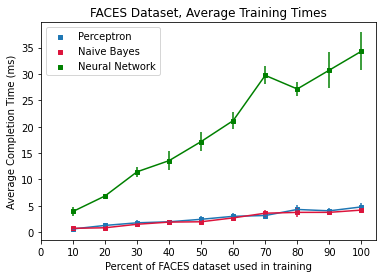

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset, Average Training Times")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

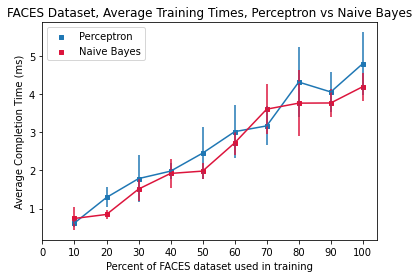

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset, Average Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

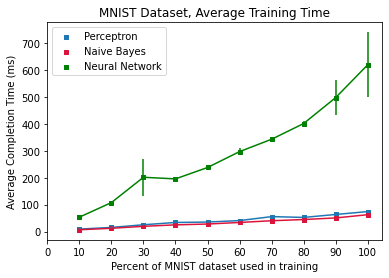

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Average Training Time")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

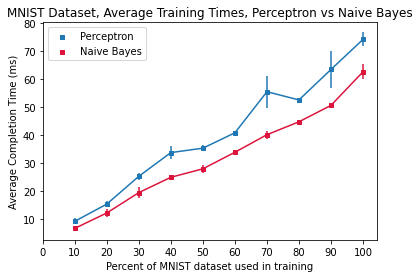

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Average Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Completion Time (ms)")
plt.show()

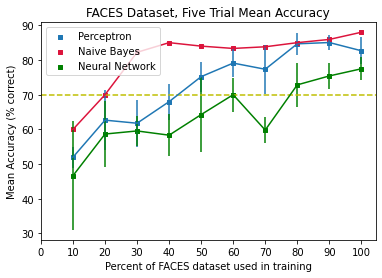

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("FACES Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()

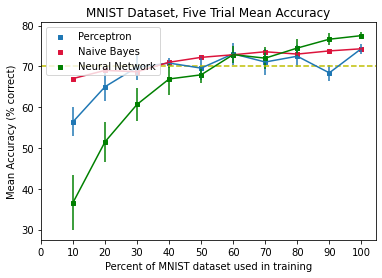

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()

In [13]:
pd.options.display.max_rows = 1000
df.head(len(df))

,Dataset,Model,Percent,Trial,Accuracy,Time
0,0,0,10,0,53.333333,0.8182
1,0,0,10,1,53.333333,0.5958
2,0,0,10,2,53.333333,0.5876
3,0,0,10,3,46.666667,0.5817
4,0,0,10,4,53.333333,0.5237
5,0,1,10,0,60.000000,1.2362
6,0,1,10,1,60.000000,0.4259
7,0,1,10,2,60.000000,0.7380
8,0,1,10,3,60.000000,0.6567
9,0,1,10,4,60.000000,0.6415


In [14]:
ag.head(len(ag))

,Dataset,Model,Percent,acc_avg,acc_std,time_avg,time_std
0,0,0,10,52.000000,2.981424,0.62140,0.113633
1,0,0,20,62.666667,8.628119,1.28978,0.261901
2,0,0,30,61.777778,6.740334,1.78444,0.618932
3,0,0,40,68.000000,5.190804,1.97978,0.211321
4,0,0,50,75.200000,4.279148,2.45230,0.675125
5,0,0,60,79.111111,4.036867,3.01546,0.690691
6,0,0,70,77.333333,7.075876,3.16666,0.511010
7,0,0,80,84.666667,3.151278,4.31554,0.917835
8,0,0,90,85.037037,2.246778,4.05640,0.521762
9,0,0,100,82.666667,3.829708,4.79962,0.822319
